# Machine Learning Project: IoT Attack Detection
## Mini-projet N°2 - Data Science -ML

**Objective:** Detect and classify different types of attacks in IoT networks using machine learning.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.model_selection import GridSearchCV

import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('RT_IOT2022.txt', sep=',') 
df.head()

,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish


In [4]:
print("DATASET INFORMATION")
print(f"\nNumber of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nColumn names:")
print(df.columns.tolist())

DATASET INFORMATION

Number of rows: 123117
Number of columns: 85

Column names:
['Unnamed: 0', 'id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot', 'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot', 'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot', 'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count', 'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count', 'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count', 'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min', 'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg', 'bwd_pkts_payload.std', 'flow_pkts_payload.min', 'flow_pkts_payload.max', 'flow_pkts_payload.tot', 'flow_pkts

In [5]:
print("\nData Types:")
print(df.dtypes.value_counts())
df.info()


Data Types:
float64    56
int64      26
object      3
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec  

In [6]:
df.columns[-5:]
target_col = df.columns[-1] 
print(f"\nTarget variable: {target_col}")
print(f"\nAttack types distribution:")
print(df[target_col].value_counts())


Target variable: Attack_type

Attack types distribution:
Attack_type
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64


Missing values per column:
Empty DataFrame
Columns: [Missing, Percentage]
Index: []


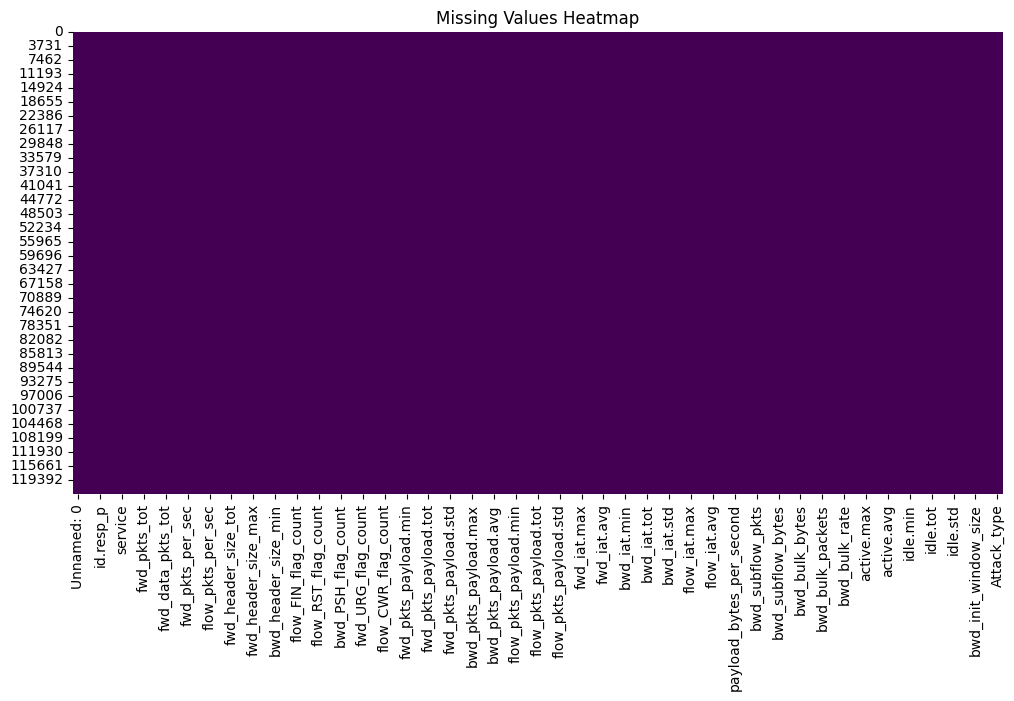

In [7]:
print("Missing values per column:")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing': missing, 'Percentage': missing_percent})
print(missing_df[missing_df['Missing'] > 0])

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [8]:
print("Statistical Summary:")
df.describe()

Statistical Summary:


,Unnamed: 0,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
count,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,1.231170e+05,1.231170e+05,...,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,123117.000000,123117.000000,123117.000000
mean,37035.089248,34639.258738,1014.305092,3.809566,2.268826,1.909509,1.471218,0.820260,3.518063e+05,3.517620e+05,...,1.481354e+05,2.353599e+04,1.616655e+06,1.701956e+06,3.517644e+06,1.664985e+06,4.550183e+04,6118.905123,2739.776018,751.647514
std,30459.106367,19070.620354,5256.371994,130.005408,22.336565,33.018311,19.635196,32.293948,3.707645e+05,3.708015e+05,...,1.613007e+06,1.477935e+06,8.809396e+06,9.252337e+06,1.229508e+08,9.007064e+06,1.091361e+06,18716.313861,10018.848534,6310.183843
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,6059.000000,17702.000000,21.000000,0.000001,1.000000,1.000000,1.000000,0.000000,7.454354e+01,7.288927e+01,...,9.536740e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
50%,33100.000000,37221.000000,21.000000,0.000004,1.000000,1.000000,1.000000,0.000000,2.467238e+05,2.467238e+05,...,4.053116e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
75%,63879.000000,50971.000000,21.000000,0.000005,1.000000,1.000000,1.000000,0.000000,5.242880e+05,5.242880e+05,...,5.006790e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
max,94658.000000,65535.000000,65389.000000,21728.335578,4345.000000,10112.000000,4345.000000,10105.000000,1.048576e+06,1.048576e+06,...,4.374931e+08,4.774862e+08,3.000000e+08,3.000000e+08,2.096777e+10,3.000000e+08,1.208029e+08,65535.000000,65535.000000,65535.000000


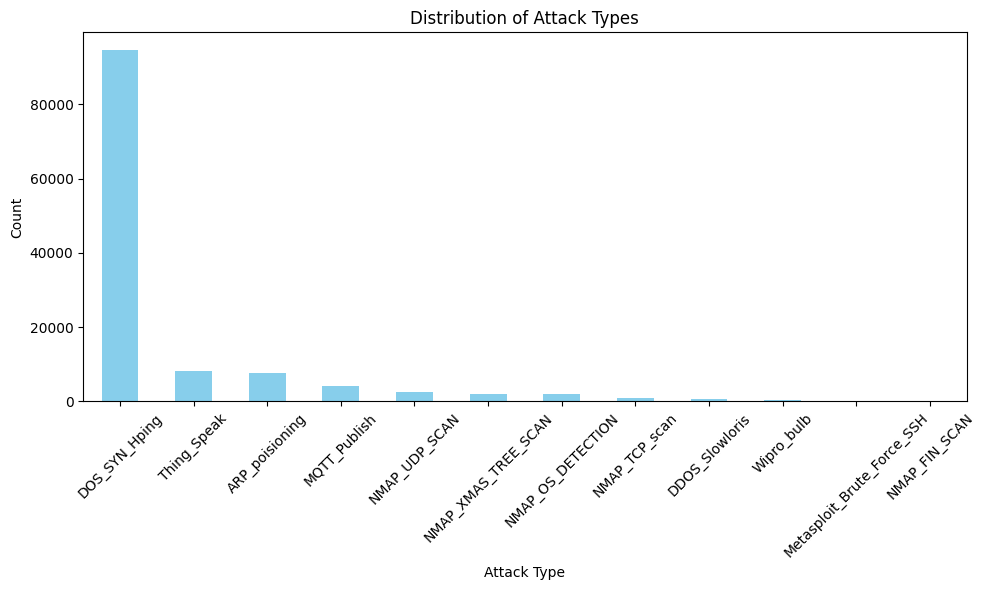

In [9]:
plt.figure(figsize=(10, 6))
df[target_col].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


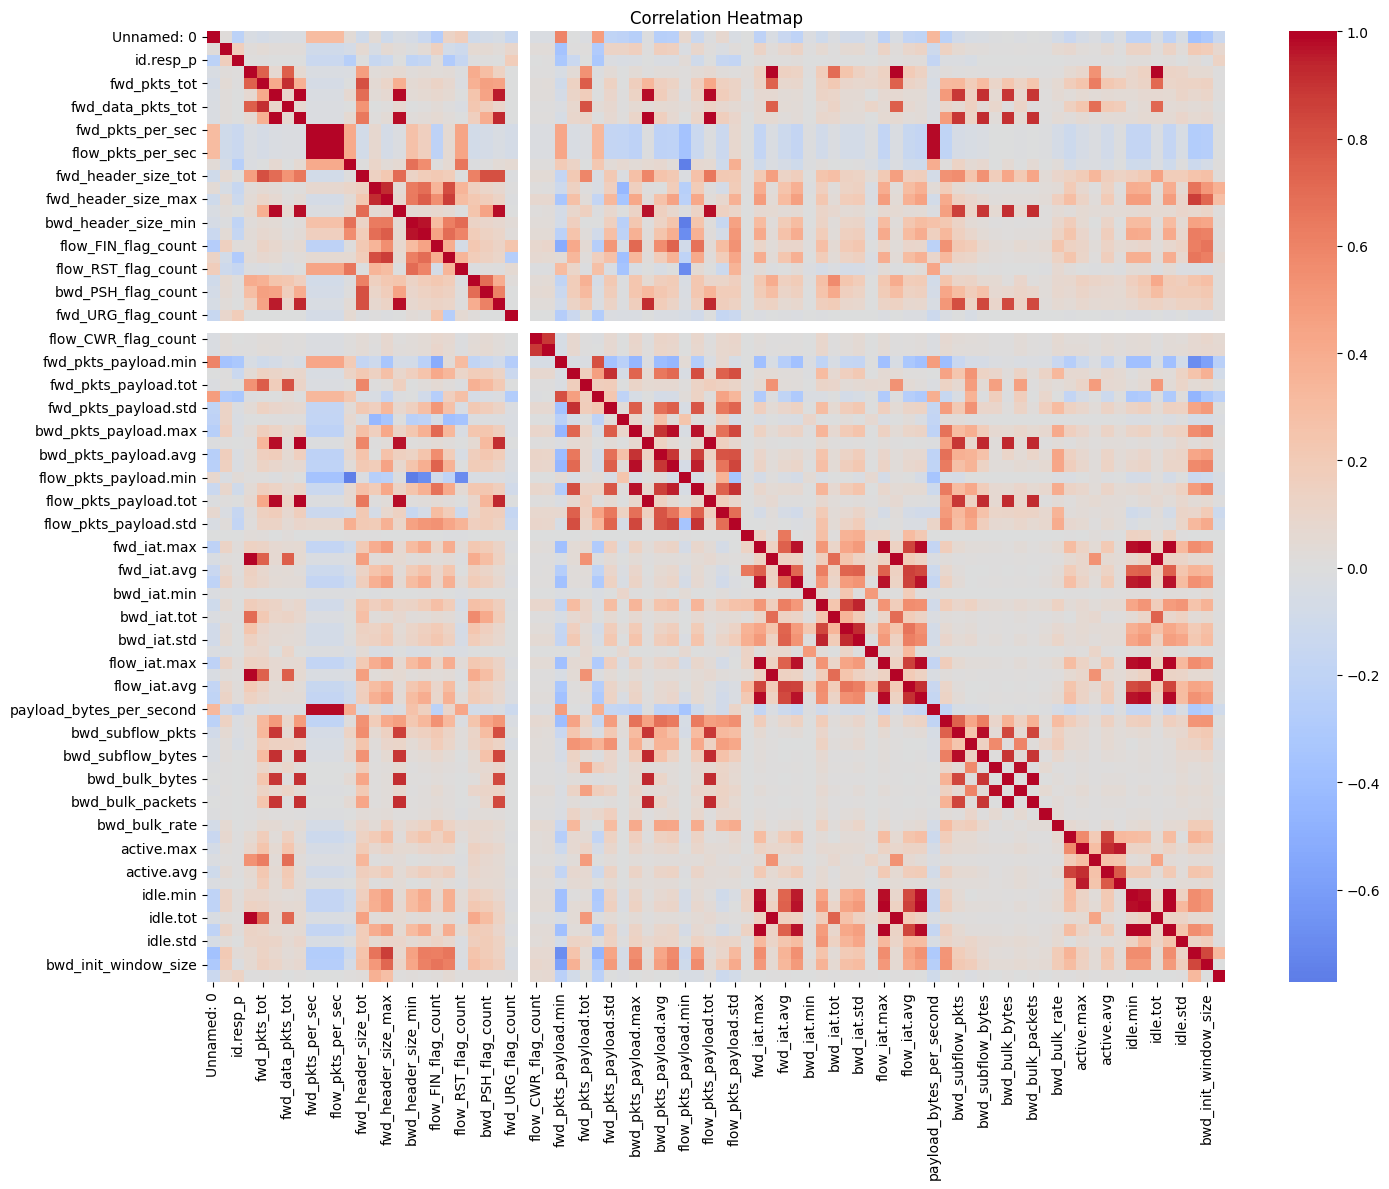

In [10]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [11]:
threshold = 0.5
df_clean = df.dropna(thresh=int(threshold * len(df)), axis=1)
df_clean = df_clean.fillna(df_clean.mean(numeric_only=True))

print(f"Shape after cleaning: {df_clean.shape}")
print(f"Remaining missing values: {df_clean.isnull().sum().sum()}")

Shape after cleaning: (123117, 85)
Remaining missing values: 0


In [12]:
X = df_clean.drop(columns=[target_col])
y = df_clean[target_col]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (123117, 84)
Target shape: (123117,)


In [13]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Target encoding:")
print(dict(zip(le.classes_, le.transform(le.classes_))))

Target encoding:
{'ARP_poisioning': np.int64(0), 'DDOS_Slowloris': np.int64(1), 'DOS_SYN_Hping': np.int64(2), 'MQTT_Publish': np.int64(3), 'Metasploit_Brute_Force_SSH': np.int64(4), 'NMAP_FIN_SCAN': np.int64(5), 'NMAP_OS_DETECTION': np.int64(6), 'NMAP_TCP_scan': np.int64(7), 'NMAP_UDP_SCAN': np.int64(8), 'NMAP_XMAS_TREE_SCAN': np.int64(9), 'Thing_Speak': np.int64(10), 'Wipro_bulb': np.int64(11)}


In [14]:
categorical_cols = X.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_cols.tolist()}")

for col in categorical_cols:
    le_col = LabelEncoder()
    X[col] = le_col.fit_transform(X[col].astype(str))


Categorical columns: ['proto', 'service']


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print(f"Scaled data shape: {X_scaled.shape}")

Scaled data shape: (123117, 84)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 98493
Testing set size: 24624


In [17]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss'),
    'LightGBM': LGBMClassifier(verbose=-1)
}

for name in models.keys():
    print(f"- {name}")

- Logistic Regression
- Decision Tree
- Random Forest
- KNN
- SVM
- Naive Bayes
- Gradient Boosting
- AdaBoost
- XGBoost
- LightGBM


In [18]:
results = {}

for name, model in models.items():
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    
    print(f"{name} - Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")

Logistic Regression - Accuracy: 0.9901, F1-Score: 0.9900
Decision Tree - Accuracy: 0.9983, F1-Score: 0.9983
Random Forest - Accuracy: 0.9992, F1-Score: 0.9992
KNN - Accuracy: 0.9965, F1-Score: 0.9965
SVM - Accuracy: 0.9944, F1-Score: 0.9943
Naive Bayes - Accuracy: 0.9543, F1-Score: 0.9533
Gradient Boosting - Accuracy: 0.9982, F1-Score: 0.9981
AdaBoost - Accuracy: 0.9028, F1-Score: 0.8886
XGBoost - Accuracy: 0.9992, F1-Score: 0.9992


LightGBMError: Do not support special JSON characters in feature name.

In [23]:
X_train_clean = clean_feature_names(X_train)
X_test_clean = clean_feature_names(X_test)
lgbm_model = LGBMClassifier(verbose=-1)
lgbm_model.fit(X_train_clean, y_train)

y_pred = lgbm_model.predict(X_test_clean)

results['LightGBM'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
    'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
    'F1-Score': f1_score(y_test, y_pred, average='weighted', zero_division=0)
}

print(f"LightGBM - Accuracy: {results['LightGBM']['Accuracy']:.4f}, F1-Score: {results['LightGBM']['F1-Score']:.4f}")

LightGBM - Accuracy: 0.2331, F1-Score: 0.3167


MODEL COMPARISON:
                     Accuracy  Precision    Recall  F1-Score
XGBoost              0.999228   0.999241  0.999228  0.999233
Random Forest        0.999228   0.999230  0.999228  0.999229
Decision Tree        0.998294   0.998304  0.998294  0.998295
Gradient Boosting    0.998173   0.998203  0.998173  0.998101
KNN                  0.996548   0.996556  0.996548  0.996539
SVM                  0.994396   0.994518  0.994396  0.994271
Logistic Regression  0.990091   0.990096  0.990091  0.989975
Naive Bayes          0.954313   0.969380  0.954313  0.953253
AdaBoost             0.902818   0.892395  0.902818  0.888580
LightGBM             0.233147   0.816222  0.233147  0.316706


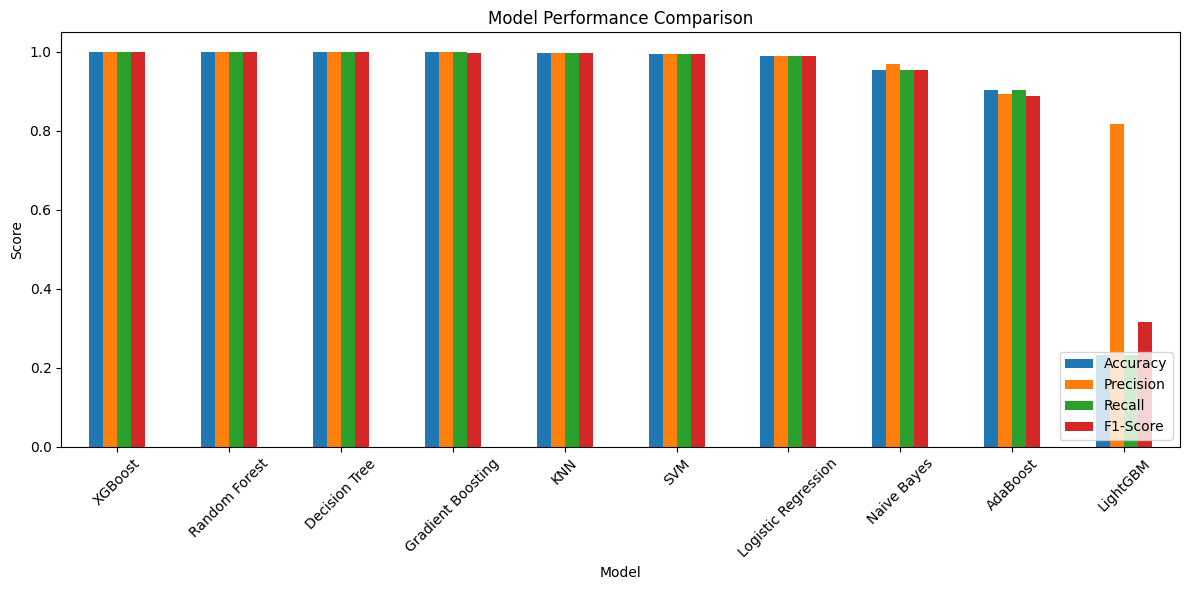

In [24]:
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('Accuracy', ascending=False)

print("MODEL COMPARISON:")
print(results_df)

results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
top_2_models = results_df.head(2).index.tolist()
print(f"Top 2 models: {top_2_models}")

Top 2 models: ['XGBoost', 'Random Forest']


In [26]:
print(f"Tuning {top_2_models[0]}...")
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
grid_search_1 = GridSearchCV(
    RandomForestClassifier(),
    param_grid_rf,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_search_1.fit(X_train, y_train)

print(f"Best parameters: {grid_search_1.best_params_}")
print(f"Best score: {grid_search_1.best_score_:.4f}")

best_model_1 = grid_search_1.best_estimator_

Tuning XGBoost...
Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.9987


In [27]:
print(f"Tuning {top_2_models[1]}...")

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}
grid_search_2 = GridSearchCV(
    XGBClassifier(eval_metric='mlogloss'),
    param_grid_xgb,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_search_2.fit(X_train, y_train)

print(f"Best parameters: {grid_search_2.best_params_}")
print(f"Best score: {grid_search_2.best_score_:.4f}")
best_model_2 = grid_search_2.best_estimator_

Tuning Random Forest...
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best score: 0.9989


In [28]:
y_pred_1 = best_model_1.predict(X_test)
y_pred_2 = best_model_2.predict(X_test)
acc_1 = accuracy_score(y_test, y_pred_1)
acc_2 = accuracy_score(y_test, y_pred_2)
print(f"{top_2_models[0]} Accuracy: {acc_1:.4f}")
print(f"{top_2_models[1]} Accuracy: {acc_2:.4f}")

if acc_1 > acc_2:
    final_model = best_model_1
    final_model_name = top_2_models[0]
    y_pred_final = y_pred_1
else:
    final_model = best_model_2
    final_model_name = top_2_models[1]
    y_pred_final = y_pred_2

print(f"\nFinal Model: {final_model_name}")

XGBoost Accuracy: 0.9991
Random Forest Accuracy: 0.9991

Final Model: Random Forest


In [29]:
print(f"FINAL MODEL: {final_model_name}")
accuracy = accuracy_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final, average='weighted')
recall = recall_score(y_test, y_pred_final, average='weighted')
f1 = f1_score(y_test, y_pred_final, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final, target_names=le.classes_))

FINAL MODEL: Random Forest
Accuracy: 0.9991
Precision: 0.9991
Recall: 0.9991
F1-Score: 0.9991

Classification Report:
                            precision    recall  f1-score   support

            ARP_poisioning       0.99      1.00      1.00      1550
            DDOS_Slowloris       0.99      0.97      0.98       107
             DOS_SYN_Hping       1.00      1.00      1.00     18932
              MQTT_Publish       1.00      1.00      1.00       829
Metasploit_Brute_Force_SSH       1.00      1.00      1.00         7
             NMAP_FIN_SCAN       0.71      0.83      0.77         6
         NMAP_OS_DETECTION       1.00      1.00      1.00       400
             NMAP_TCP_scan       1.00      1.00      1.00       200
             NMAP_UDP_SCAN       0.99      1.00      0.99       518
       NMAP_XMAS_TREE_SCAN       1.00      1.00      1.00       402
               Thing_Speak       1.00      1.00      1.00      1622
                Wipro_bulb       1.00      1.00      1.00        

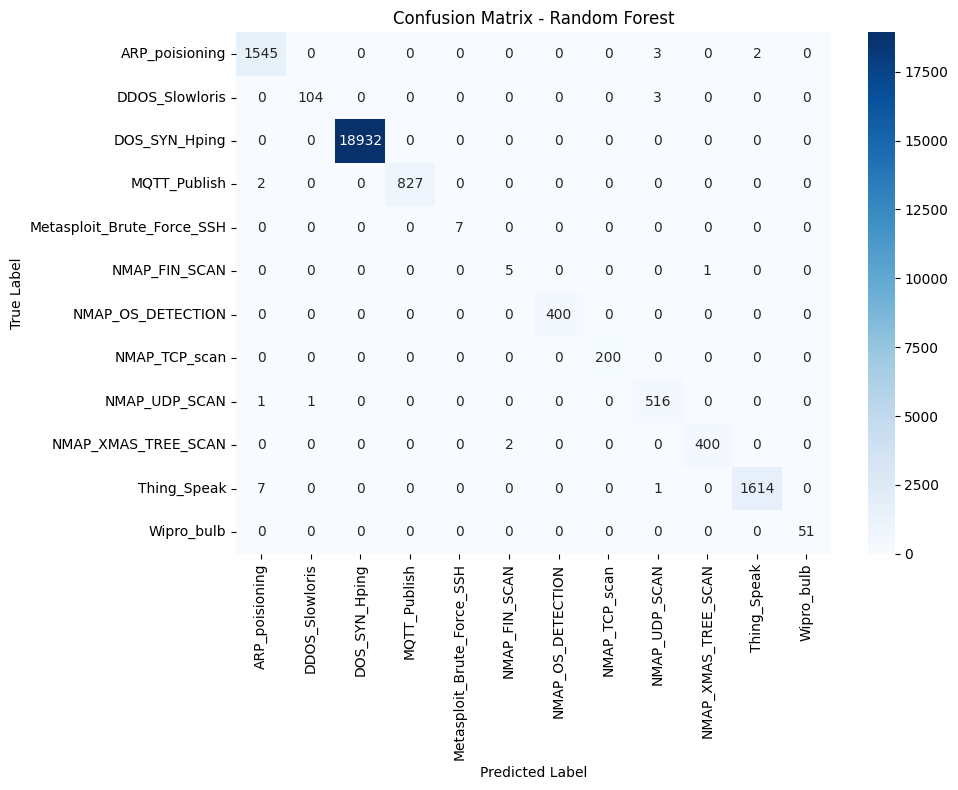

In [30]:
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Confusion Matrix - {final_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [31]:
pickle.dump(final_model, open('model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(le, open('label_encoder.pkl', 'wb'))
print("Files created: model.pkl, scaler.pkl, label_encoder.pkl")

Files created: model.pkl, scaler.pkl, label_encoder.pkl


In [32]:
loaded_model = pickle.load(open('model.pkl', 'rb'))
loaded_scaler = pickle.load(open('scaler.pkl', 'rb'))
loaded_le = pickle.load(open('label_encoder.pkl', 'rb'))
sample = X_test.iloc[0:1]
prediction = loaded_model.predict(sample)
predicted_class = loaded_le.inverse_transform(prediction)

print(f"Test prediction: {predicted_class[0]}")
print("Model loaded ")

Test prediction: DOS_SYN_Hping
Model loaded 
